#Scripts de PyPlot para hacer las figuras *à la Journ. NeuroSciences*...

Primero, vamos a intentarlo con un experimento que tenga una actividad notoria. Aquí cargamos un archivo que contiene los datos de un experimento con actividad epiléptica. La región CA aparece muy activa varias veces en las mediciones del potencial de campo local, LFP de ahora en adelante.

In [1]:
using PyPlot

INFO: Loading help data...


In [8]:
ParaMostrar=readdlm("EjemploPlaticaCrudo01.dat");
size(ParaMostrar)

(1001,1)

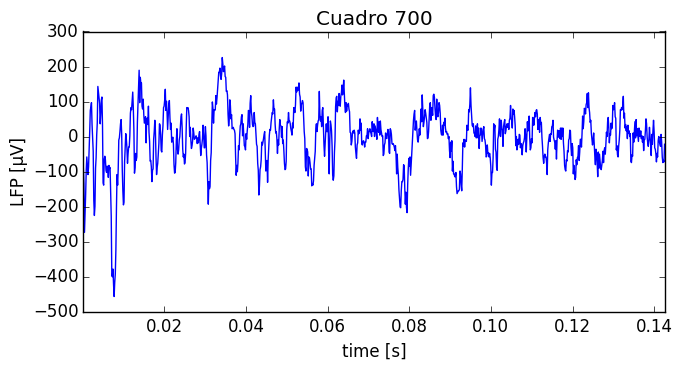

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe004953048>

In [9]:
tiempo=1:1001
t=700
tit="Cuadro $t"
figure(figsize=(7.5,3.5))
PyPlot.xlim(1/7022,1001/7022)
xlabel("time [s]")
ylabel("LFP [µV]")
title(tit)
plot(tiempo/7022,ParaMostrar)

In [28]:
ParaMostrarSuave=readdlm("EjemploPlaticaSuave01.dat");

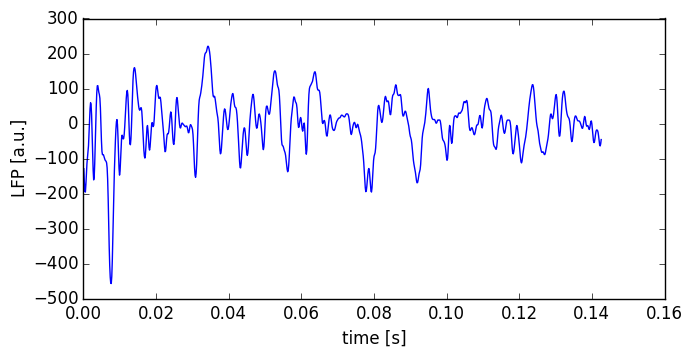

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe0046e6a20>

In [29]:
tiempo=1:1001
figure(figsize=(7.5,3.5))
xlabel("time [s]")
ylabel("LFP [a.u.]")
plot(tiempo/7022,ParaMostrarSuave)

In [46]:
PyPlot.rc(font1)  #esto que?

In [75]:
t=700
EjemploCentrosCSDPos=readdlm("GarbageCollector/CMPosLapla-$t.dat")
xxpos=EjemploCentrosCSDPos[:,1]
yypos=EjemploCentrosCSDPos[:,2]
valorpos=EjemploCentrosCSDPos[:,3]
EjemploCentrosCSDNeg=readdlm("GarbageCollector/CMNegLapla-$t.dat")
xxneg=EjemploCentrosCSDNeg[:,1]
yyneg=EjemploCentrosCSDNeg[:,2]
valorneg=EjemploCentrosCSDNeg[:,3];
CSDEjemplo=readdlm("GarbageCollector/CSD-$t.dat");

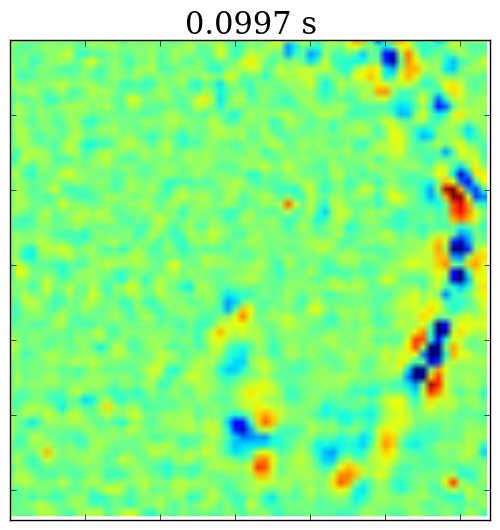

false

In [76]:
PyPlot.ion()
#################
font1 = ["family"=>"serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>22]
seg=round(t/7022, 4)
titulo="$seg s"
figure()
PyPlot.xlim(0,64)
PyPlot.ylim(64,0)
tick_params(labelbottom="off", labelleft="off")
otraimagen=imshow(CSDEjemplo, cmap="jet", origin="upper", vmin=-150, vmax=150)
#cb=colorbar(otraimagen)
#cb=colorbar(otraimagen, ticks=[-150, +150],fraction=0.046, pad=0.04, use_gridspace='True')
#cb=colorbar(otraimagen, ticks=[-150, +150], use_gridspec="True")
#farofa=cb[:set_ticklabels]([{""}, {""}])
#xlabel("furufu", fontdict=font1)
#scatter(xxpos,yypos, s=valorpos, alpha=0.4, c="r", edgecolors="none")
#scatter(xxneg, yyneg, s=abs(valorneg), alpha=0.4, c="b", edgecolors="none")
#scatter(xxpos,yypos, s=0.02*valorpos, alpha=0.9, c="r", edgecolors="none")
#scatter(xxneg, yyneg,s=0.02*abs(valorneg), alpha=0.9, c="b", edgecolors="none")

#annotate("Sink",
#    xy=[1.05;-0.11],
#    xycoords="axes fraction",
#    xytext=[-10,10],
#    textcoords="offset points",
# font_properties="serif",
#    fontsize=24.0,
#    ha="left",
#    va="bottom")

#annotate("Source",
#    xy=[1.05;0.98],
#    xycoords="axes fraction",
#    xytext=[-10,10],
#    textcoords="offset points",
#font_properties=("serif"),
#fontsize=24,
#ha="left",
#    va="bottom")

title(titulo, fontdict=font1)
 #tight_layout()
savefig("CSD_nocb-$t.png", dpi=36)
PyPlot.close_queued_figs()

In [66]:
dedonde, adonde = 600, 2300
PyPlot.ioff()

In [9]:
@time for t=dedonde:adonde
    #read the data
    EjemploCentrosCSDPos=readdlm("GarbageCollector/CMPosLapla-$t.dat")
    xxpos=EjemploCentrosCSDPos[:,1]
    yypos=EjemploCentrosCSDPos[:,2]
    valorpos=EjemploCentrosCSDPos[:,3]
    EjemploCentrosCSDNeg=readdlm("GarbageCollector/CMNegLapla-$t.dat")
    xxneg=EjemploCentrosCSDNeg[:,1]
    yyneg=EjemploCentrosCSDNeg[:,2]
    valorneg=EjemploCentrosCSDNeg[:,3];
    CSDEjemplo=readdlm("GarbageCollector/CSD-$t.dat");
    #plot the data
    figure()
    seg=round(t/7022, 3)
    titulo="$seg s"
    PyPlot.xlim(0,64)
    PyPlot.ylim(64,0)
    
    otraimagen=imshow(CSDEjemplo, cmap="jet", origin="upper", vmin=-150, vmax=150)
    #cb=colorbar(otraimagen)
    cb=colorbar(otraimagen, ticks=[-150, +150],fraction=0.046, pad=0.04 )
    cb[:set_ticklabels]([{""}, {""}])
    
    
    annotate("Sink",
    xy=[1.05;-0.11],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=24.0,
    ha="left",
    va="bottom")

    annotate("Source",
    xy=[1.05;0.98],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=24.0,
    ha="left",
    va="bottom")

    
    #scatter(xxpos,yypos, s=valorpos, alpha=0.4, c="r")
    #scatter(xxneg, yyneg, s=abs(valorneg), alpha=0.4, c="b")
    #plot(xxpos,yypos, "r.")
    #plot(xxneg, yyneg, "b.")
    title(titulo)
    savefig("GarbageCollector/CSD_cb-$t.png", dpi=72)
    PyPlot.close_queued_figs()
end

LoadError: PyError (:PyObject_Call) <type 'exceptions.ValueError'>
ValueError('Format "dat" is not supported.\nSupported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff.',)
  File "/usr/lib/pymodules/python2.7/matplotlib/pyplot.py", line 561, in savefig
    return fig.savefig(*args, **kwargs)
  File "/usr/lib/pymodules/python2.7/matplotlib/figure.py", line 1421, in savefig
    self.canvas.print_figure(*args, **kwargs)
  File "/usr/lib/pymodules/python2.7/matplotlib/backend_bases.py", line 2129, in print_figure
    print_method = self._get_print_method(format)
  File "/usr/lib/pymodules/python2.7/matplotlib/backend_bases.py", line 2070, in _get_print_method
    '%s.' % (format, ', '.join(formats)))

while loading In[9], in expression starting on line 1

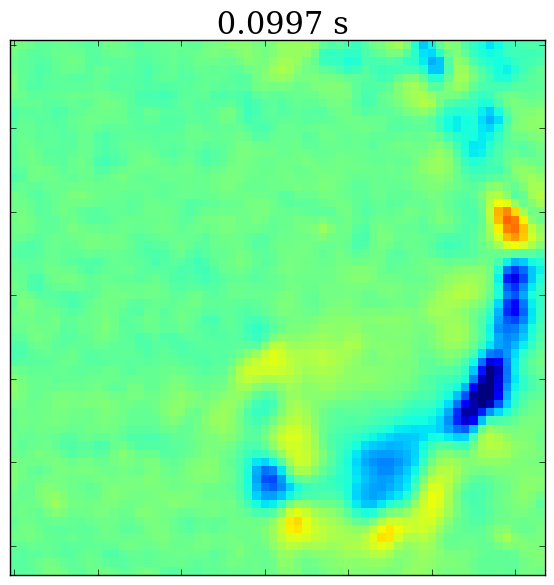

In [98]:
#guacala de jet. pero les gusta a los Journ. de Neurosc.
#PyPlot.ioff()
#for t=dedonde+10:adonde
t=700
    lala=figure()
    tick_params(labelbottom="off", labelleft="off")
    b=round(t/7022, 4)
    titulo=" $b s"
    DatosSuaves=readdlm("GarbageCollector/LFPSuave-$t.dat")
    imagen=imshow(DatosSuaves, origin="upper", vmin=-200, vmax=200, interpolation="none")
#cb=colorbar(imagen, ticks=[-200, 0, +200],fraction=0.046, pad=0.04, use_gridspec="True" )
#    cb[:set_label]("recorded voltage [µV]  ", fontsize=20)
#cb[:ax][:tick_params](labelsize=20)
title(titulo, fontdict=font1)
tight_layout()
savefig("LFP_nocb-$t.png", dpi=36)
    PyPlot.close_queued_figs()
    gc()
#end